In [1]:
s=['Congrats You have won a lottery and if you want lottery money call the lottery number and get your money',
  'Give your bank details for lottery money',
   'lottery for sure if bank details are verified'
  ]

In [2]:
type(s)

list

In [3]:
s[0].split()

['Congrats',
 'You',
 'have',
 'won',
 'a',
 'lottery',
 'and',
 'if',
 'you',
 'want',
 'lottery',
 'money',
 'call',
 'the',
 'lottery',
 'number',
 'and',
 'get',
 'your',
 'money']

# Count Vectorizer

In [4]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
op=vect.fit_transform(s).toarray()
op

array([[2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 3, 2, 1, 0, 1, 0, 1, 1, 2, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

In [5]:
vect.get_feature_names()

['and',
 'are',
 'bank',
 'call',
 'congrats',
 'details',
 'for',
 'get',
 'give',
 'have',
 'if',
 'lottery',
 'money',
 'number',
 'sure',
 'the',
 'verified',
 'want',
 'won',
 'you',
 'your']

In [6]:
import pandas as pd
df=pd.DataFrame(op,columns=vect.get_feature_names())
df

,and,are,bank,call,congrats,details,for,get,give,have,...,lottery,money,number,sure,the,verified,want,won,you,your
0,2,0,0,1,1,0,0,1,0,1,...,3,2,1,0,1,0,1,1,2,1
1,0,0,1,0,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1
2,0,1,1,0,0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [7]:
df.shape

(3, 21)

### Using stop_words to reduce number of columns

In [8]:
vect=CountVectorizer(stop_words='english')
op=vect.fit_transform(s).toarray()
op

array([[0, 1, 0, 3, 2, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]], dtype=int64)

In [9]:
vect.get_feature_names()

['bank',
 'congrats',
 'details',
 'lottery',
 'money',
 'number',
 'sure',
 'verified',
 'want',
 'won']

In [10]:
df=pd.DataFrame(op,columns=vect.get_feature_names())
df

,bank,congrats,details,lottery,money,number,sure,verified,want,won
0,0,1,0,3,2,1,0,0,1,1
1,1,0,1,1,1,0,0,0,0,0
2,1,0,1,1,0,0,1,1,0,0


In [11]:
df.shape

(3, 10)

# TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(stop_words='english')
op=vect.fit_transform(s).toarray()
df=pd.DataFrame(op,columns=vect.get_feature_names())
df

,bank,congrats,details,lottery,money,number,sure,verified,want,won
0,0.000000,0.325248,0.000000,0.576289,0.494718,0.325248,0.000000,0.000000,0.325248,0.325248
1,0.526820,0.000000,0.526820,0.409123,0.526820,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.406192,0.000000,0.406192,0.315444,0.000000,0.000000,0.534093,0.534093,0.000000,0.000000


# Using dataset spam_ham

In [13]:
import pandas as pd
path='https://raw.githubusercontent.com/diazonic/Machine-Learning-using-sklearn/master/Datasets/spam.tsv'
df1=pd.read_csv(path,sep='\t')
# pd.read_table(path)
df1

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [14]:
# count number of spam & ham message
df1.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:>

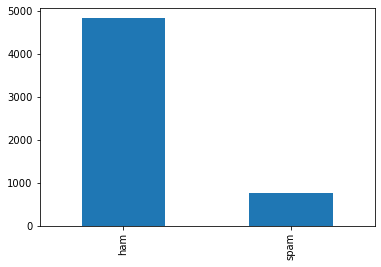

In [15]:
# imbalanced dataset = since one value is higher than other
df1.label.value_counts().plot(kind='bar')

In [16]:
# I / O
x=df1.message.values
y=df1.label.values

In [17]:
# split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [18]:
print(x_train.shape)
print(x_test.shape)

(4179,)
(1393,)


In [19]:
import numpy as np
np.unique(y_train,return_counts=True)

(array(['ham', 'spam'], dtype=object), array([3617,  562], dtype=int64))

In [20]:
np.unique(y_test,return_counts=True)

(array(['ham', 'spam'], dtype=object), array([1208,  185], dtype=int64))

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()

x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [22]:
# Predict
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [23]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)

0.9856424982053122

In [25]:
confusion_matrix(y_pred,y_test)

array([[1208,   20],
       [   0,  165]], dtype=int64)

In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1228
        spam       0.89      1.00      0.94       165

    accuracy                           0.99      1393
   macro avg       0.95      0.99      0.97      1393
weighted avg       0.99      0.99      0.99      1393



## Evaluation for single specific message

In [27]:
text=df1['message'][10]
text

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [28]:
df1['label'][10]

'ham'

In [29]:
# Method 1 : predict value using tfidf
text=vect.transform([text])
model.predict(text)

array(['ham'], dtype=object)

 Method 2
 1. Gather data
 2. splitting
 3. applt TfidfVect..
 4. SVM algorithm
 5. predict

 predict for real_world data
 1. apply transform of tfidf , vector
 2. Model.predict
 Use pipeline in sklearn : multiple methond in single line
-  svm + Tfidf

In [30]:
# split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [31]:
# Method 2
from sklearn.pipeline import Pipeline
text_model = Pipeline([('vect1', TfidfVectorizer()), ('model1', SVC())])

- fit transform for TfidfVectorizer
- fit for SVC 

In [32]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('vect1', TfidfVectorizer()), ('model1', SVC())])

In [33]:
y_pred=text_model.predict(y_train)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [34]:
accuracy_score(y_pred,y_train)

0.8655180665230916

In [37]:
text=df1['message'][10]
text_model.predict([text])

array(['ham'], dtype=object)

In [38]:
# Save model with complete pipeline
# pickle, joblib, sklearn.json  : Serialization(dump) & deserialization(load)
import joblib
joblib.dump(text_model,'spam_ham')

['spam_ham']

### CHECK LOADING IN OTHER IPYNB NOTEBOOK